In [1]:
import pandas as pd
import logomaker as lm
import numpy as np

import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

Matplotlib is building the font cache; this may take a moment.


In [3]:
data_df = pd.read_csv('250226_LA_randpad_mean.csv')[['name', 'sequence', 'res_idx', 'res_value_bool', 'smooth_prob', 'spiky_prob']].reset_index(drop=True)
data_df2515 = pd.read_csv('250226_LA_recombine2515_mean.csv')[['name', 'sequence', 'res_idx', 'res_value_bool', 'smooth_prob', 'spiky_prob']].reset_index(drop=True)
data_df10015 = pd.read_csv('250226_LA_recombine10015_mean.csv')[['name', 'sequence', 'res_idx', 'res_value_bool', 'smooth_prob', 'spiky_prob']].reset_index(drop=True)
data_df10x10 = pd.read_csv('250228_LA_weightedmean_10x10.csv')[['name', 'sequence', 'res_idx', 'res_value_bool', 'smooth_prob', 'spiky_prob']].reset_index(drop=True)
data_df10x10_075p = pd.read_csv('250228_LA_weightedmean_10x10_075penalty.csv')[['name', 'sequence', 'res_idx', 'res_value_bool', 'smooth_prob', 'spiky_prob']].reset_index(drop=True)
data_df10x10_10p = pd.read_csv('250228_LA_weightedmean_10x10_10penalty.csv')[['name', 'sequence', 'res_idx', 'res_value_bool', 'smooth_prob', 'spiky_prob']].reset_index(drop=True)
data_df10x5 = pd.read_csv('250228_LA_weightedmean_10x5.csv')[['name', 'sequence', 'res_idx', 'res_value_bool', 'smooth_prob', 'spiky_prob']].reset_index(drop=True)

In [4]:
data_df['name'].value_counts()

name
Kerato-epithelin__AP00095                                660
Myocilin__AP00090                                        472
Ovalbumin__AP00094                                       385
Glucan_1_3-beta-glucosidase__AP00110                     290
Odontogenic_ameloblast-associated_protein__AP00021       264
Alpha-s2-casein__AP00004                                 207
Prolactin__AP00001                                       199
Beta-lactoglobulin__AP00025                              162
Apomyoglobin__AP00030                                    153
Galectin-7__AP00139                                      136
DNA-binding_protein_inhibitor_ID-2__AP00076              134
Elicitor_of_hypersensitive_response_HpaG__AP00071        133
Lysozyme_C__AP00016                                      130
Chorion_class_A_protein_PC292__AP00046                   113
RdIB_protein__AP00133                                    105
Serum_Amyloid_A-1__AP00005                               104
ApoAII__AP00127    

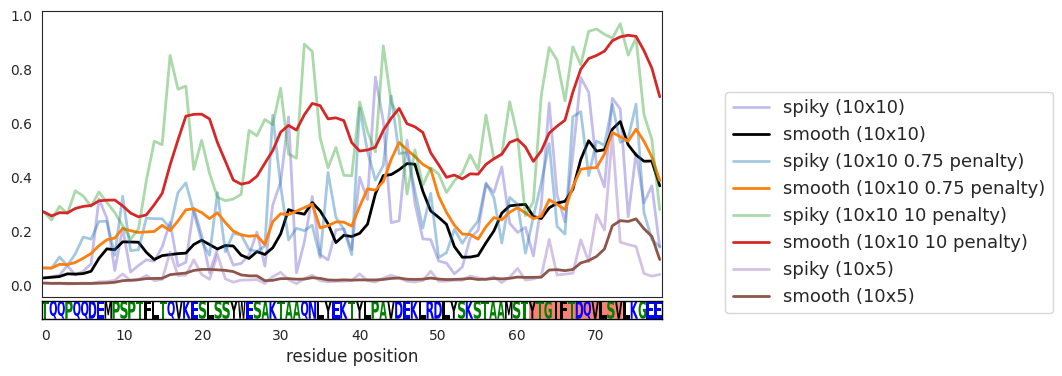

In [5]:
name = ' Apoliprotein__AP00020'
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 4), gridspec_kw={'height_ratios': [4, 0.25], 'hspace': 0.025})  # Create subplots with specified height ratios and no vertical space between subplots
ax1.plot(data_df10x10[data_df10x10['name'] == name]['spiky_prob'].reset_index(drop=True), color='slateblue', lw=2, label='spiky (10x10)', alpha=0.4)
ax1.plot(data_df10x10[data_df10x10['name'] == name]['smooth_prob'].reset_index(drop=True), color='k', lw=2, label='smooth (10x10)')

# ADD

ax1.plot(data_df10x10_075p[data_df10x10_075p['name'] == name]['spiky_prob'].reset_index(drop=True), lw=2, label='spiky (10x10 0.75 penalty)', alpha=0.4)
ax1.plot(data_df10x10_075p[data_df10x10_075p['name'] == name]['smooth_prob'].reset_index(drop=True), lw=2, label='smooth (10x10 0.75 penalty)')

ax1.plot(data_df10x10_10p[data_df10x10_10p['name'] == name]['spiky_prob'].reset_index(drop=True), lw=2, label='spiky (10x10 10 penalty)', alpha=0.4)
ax1.plot(data_df10x10_10p[data_df10x10_10p['name'] == name]['smooth_prob'].reset_index(drop=True), lw=2, label='smooth (10x10 10 penalty)')

ax1.plot(data_df10x5[data_df10x5['name'] == name]['spiky_prob'].reset_index(drop=True), lw=2, label='spiky (10x5)', alpha=0.4)
ax1.plot(data_df10x5[data_df10x5['name'] == name]['smooth_prob'].reset_index(drop=True), lw=2, label='smooth (10x5)')

# END

input_string = str(data_df[data_df['name'] == name]['sequence'].reset_index(drop=True)[0])
wt_seq = input_string
count_df = lm.alignment_to_matrix([wt_seq], to_type='counts')
ax1.set_xlim([0-0.25,len(input_string)-1+0.25])

logo_wt = lm.Logo(count_df, color_scheme='hydrophobicity', ax=ax2)
logo_wt.highlight_position_range(pmin=62, pmax=73, color='salmon')

logo_wt.ax.set_title('')
logo_wt.ax.xaxis.set_ticks_position('none')
logo_wt.style_spines(spines=['top', 'bottom', 'left', 'right'], visible=True)
logo_wt.ax.get_yaxis().set_visible(False)
ax1.get_xaxis().set_visible(False)
fig.legend(bbox_to_anchor=(1.4, 0.7), fontsize=13)
plt.xlabel('residue position', fontsize=12)

plt.show()